In [3]:
import numpy as np    # Used to deal with n-dimensional arrays
import pandas as pd    # Used to deal with Datasets
import matplotlib.pyplot as plt    # Used for Data Visualization
from sklearn.preprocessing import StandardScaler    # Used for Scaling
from sklearn.linear_model import LinearRegression    # Algorithm to be used
from sklearn.model_selection import train_test_split    # Splitting the Dataset
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV    # For Regularization
import seaborn as sns    # Used for Modern Data Visualization
import statsmodels.api as sm    # Used for Statistical Analysis of the Features and Target columns

In [4]:
df = pd.read_csv('Admission_Prediction.csv')
df.head(10)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   
5           6      330.0        115.0                5.0  4.5  3.0  9.34   
6           7      321.0        109.0                NaN  3.0  4.0  8.20   
7           8      308.0        101.0                2.0  3.0  4.0  7.90   
8           9      302.0        102.0                1.0  2.0  1.5  8.00   
9          10      323.0        108.0                3.0  3.5  3.0  8.60   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
5         1             0.90  
6         1             0.75  
7         0             0.68  
8         0             0.50  
9         0             0.45

In [5]:
import pandas_profiling
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

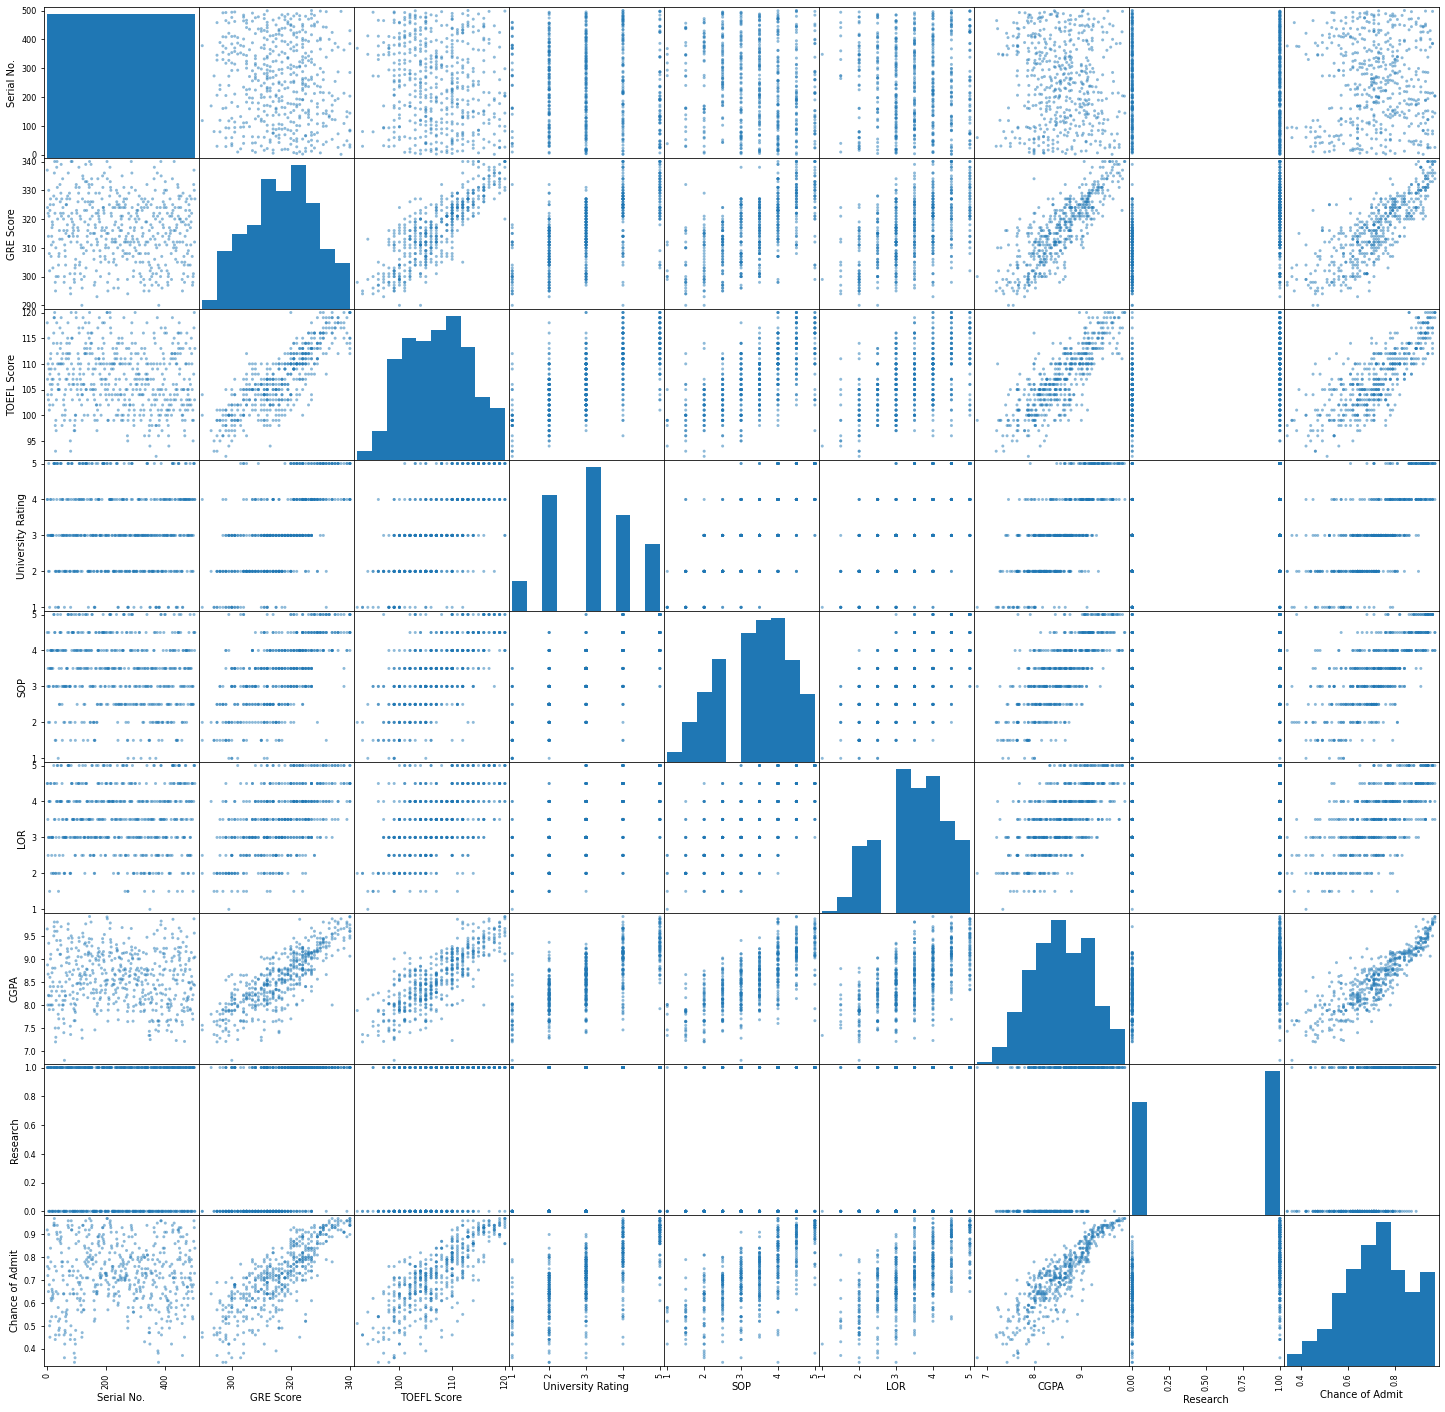

In [6]:
%matplotlib inline
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(25, 25))
plt.show()

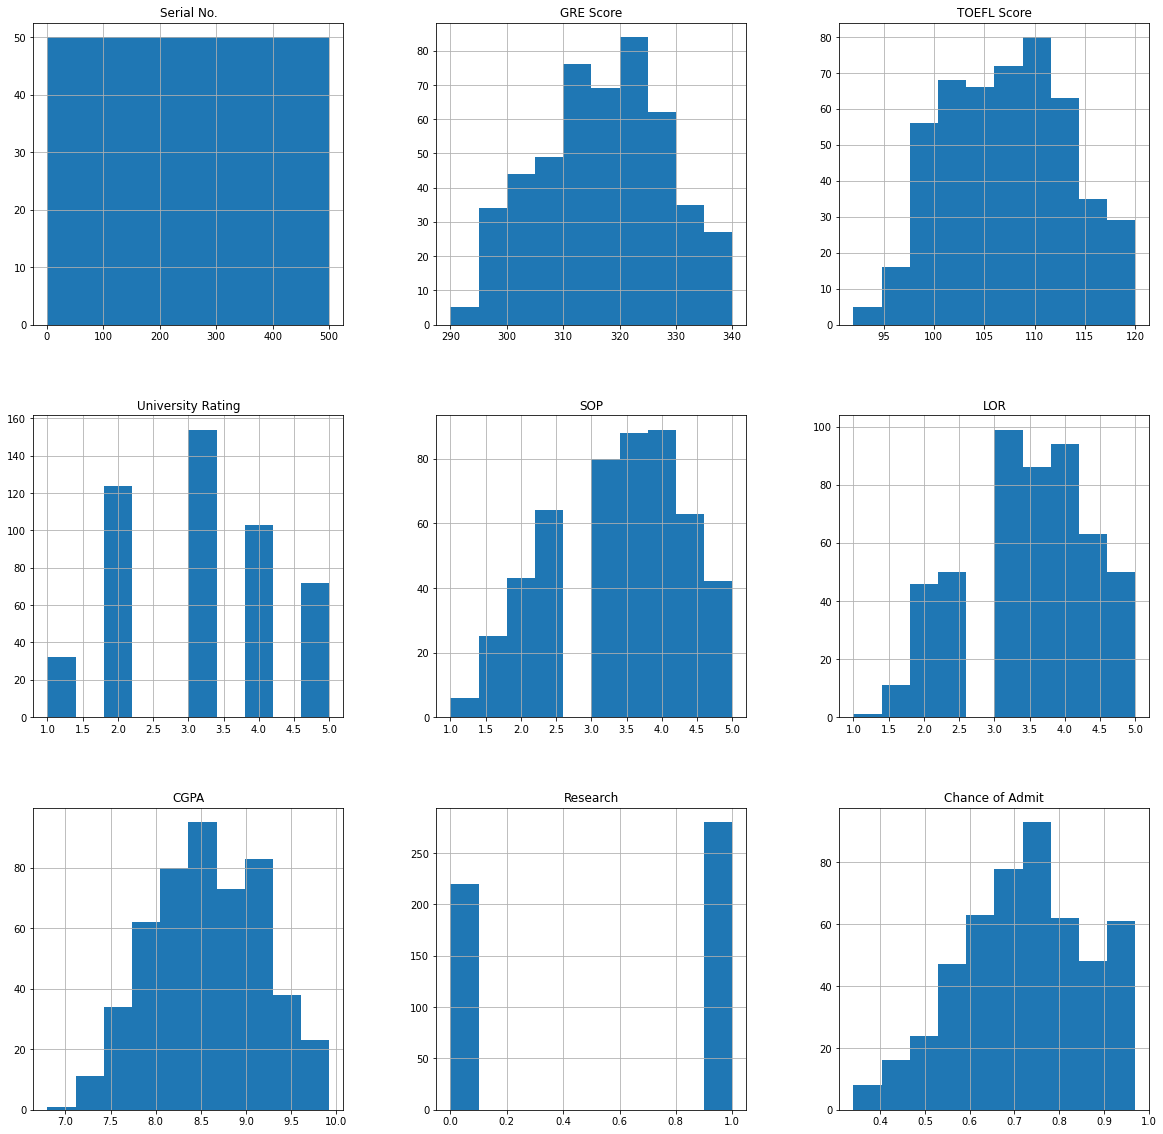

In [7]:
df.hist(figsize=(20,20))
plt.show()

***Here we can clearly see that GRE Score, TOEFL Score, University Rating are approximately following Gaussian Distribution, hence we will replace the null values in these columns with their means.***

In [8]:
df['GRE Score'].fillna(df['GRE Score'].mean(),inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(),inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(),inplace=True)

In [9]:
# Since Serial No. is not going to contribute in the model, hence it's better to drop it....
df.drop(columns=['Serial No.'],inplace=True)

In [10]:
x = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

In [11]:
scaler = StandardScaler()

***Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the
individual features do not more or less look like standard normally
distributed data (e.g. Gaussian with 0 mean and unit variance).***

In [12]:
arr = scaler.fit_transform(x)
df_scaler = pd.DataFrame(arr)
df_scaler.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(arr,i) for i in range(df_scaler.shape[1])]

[4.153267572225826,
 3.792866110594647,
 2.508768242278763,
 2.7757495092534965,
 2.037307662489752,
 4.651669561154733,
 1.4593106786827288]

In [14]:
df_vif = pd.DataFrame()
df_vif['vif'] = [variance_inflation_factor(arr,i) for i in range(df_scaler.shape[1])]
df_vif['features'] = x.columns

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(arr,y,test_size=0.15,random_state=100)

In [16]:
xtrain

array([[ 0.85111073,  0.46519653, -0.1078766 , ...,  0.01730621,
         0.30380282,  0.88640526],
       [-1.58289124, -1.1889856 , -1.88144112, ..., -1.60515091,
        -1.13609942, -1.12815215],
       [ 0.67081429,  0.63061474, -0.1078766 , ..., -2.14596996,
         0.35345462,  0.88640526],
       ...,
       [-1.04200191, -0.85814918, -0.99465886, ..., -1.06433187,
        -0.65613201, -1.12815215],
       [-0.50111259, -0.85814918, -0.1078766 , ...,  0.55812525,
         0.10519562,  0.88640526],
       [-1.31244657, -0.85814918, -1.88144112, ..., -2.14596996,
        -0.95404281, -1.12815215]])

In [17]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [18]:
import pickle
pickle.dump(lr,open('admission_lr_model.pickle','wb'))

In [19]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Admission Prediction Project.ipynb',
 'admission_lr_model.pickle',
 'Admission_Prediction.csv',
 'Advertising Data Model.ipynb',
 'Advertising.csv',
 'AI4I2020 Predictive Modelling.ipynb',
 'ai4i2020.csv',
 'finalmodeladmission.pickle',
 'linear_reg.sav',
 'report.html']

In [20]:
# We are doing scaler transform to convert the raw data into standard normal distribution....
lr.predict(scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]]))

C:\Users\yash\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.80284701])

In [21]:
mdl = pickle.load(open('admission_lr_model.pickle','rb'))
mdl.predict(scaler.transform([[324.000000,107.0,4.0,4.0,4.5,8.87,1]]))

C:\Users\yash\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.80284701])

In [22]:
lr.score(xtrain,ytrain)

0.8155546399700526

In [23]:
lr.score(xtest,ytest)

0.8420039560601401

In [24]:
# Let's create a function to create adjisuted R-Squared

def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adjusted_r2
    

In [25]:
adj_r2(xtest,ytest)

0.8254969066932891

In [26]:
adj_r2(xtrain,ytrain)

0.8124584348856171

In [27]:
lr.coef_

array([ 0.01912905,  0.01780082,  0.00550634, -0.00025051,  0.01844312,
        0.07254151,  0.01195331])

In [28]:
lr.intercept_

0.7203289055688045

# We will do Regularization now :)
# Lasso

In [29]:
lassocv = LassoCV(cv=5,max_iter=10000000,alphas=None,normalize=True)
lassocv.fit(xtrain,ytrain)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, max_iter=10000000, normalize=True)

In [30]:
lassocv.alpha_

4.203962663551952e-05

In [31]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(xtrain,ytrain)

Lasso(alpha=4.203962663551952e-05)

In [32]:
lasso.score(xtest,ytest)

0.8421260048013872

# Ridge

In [33]:
ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0),cv=10,normalize=True)
ridgecv.fit(xtrain,ytrain)

C:\Users\yash\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\yash\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [34]:
ridgecv.alpha_

0.1

In [35]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [36]:
ridge.score(xtest,ytest)

0.8420056210445822

# ElasticNet

In [37]:
elasticnetcv = ElasticNetCV(alphas=None,cv=10)
elasticnetcv.fit(xtrain,ytrain)

ElasticNetCV(cv=10)

In [38]:
elasticnetcv.alpha_

0.001391101145529104

In [39]:
elasticnetcv.l1_ratio_

0.5

In [40]:
elastic = ElasticNet(alpha=elasticnetcv.alpha_,l1_ratio=elasticnetcv.l1_ratio_)
elastic.fit(xtrain,ytrain)

ElasticNet(alpha=0.001391101145529104)

In [41]:
elastic.score(xtest,ytest)

0.8419586493164081

In [42]:
import pickle

In [46]:
pickle.dump(lasso,open('finalmodeladmission.pickle','wb'))

In [48]:
a = pickle.load(open('finalmodeladmission.pickle','rb'))

In [51]:
a.predict(([[324.000000,107.0,4.0,4.0,4.5,8.87,1]]))

array([9.5805133])